<a href="https://colab.research.google.com/github/tnleang/machineLearning/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [0]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt


# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [0]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

# MSE using numpy
def mean_square_err(test_target,predict_target):
  return np.square(np.subtract(test_target, predict_target)).sum() /(2 * len(test_target))

<h4>Use scikit-learn library in the following cell</h4>

In [3]:
# Task 1-1: use linear regression in sklearn
regr = linear_model.LinearRegression()
regr.fit(train_data,train_target)
predict_ptarget = regr.predict(test_data)
train_predict = regr.predict(train_data)

#print(test_target)
#print(predict_ptarget)
# Task 1-2: show intercept and coefficents
print('Intercept: \n', regr.intercept_ )
print('Coefficients: \n', regr.coef_)

# Task 1-3: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_ptarget)) 

Intercept: 
 [30.24675099]
Coefficients: 
 [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
  return np.matmul( np.matmul( linalg.inv( np.matmul(X.T, X)), X.T),y)
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)
predict_target = myPredictFun(test_data_intercept, w)
train_predict = myPredictFun(train_data_intercept, w)


# Task 2-3: show intercept and coefficents
print('Intercept: \n', w[0] )
print('Coefficents: \n',w[1:])



# Task 2-4: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_target)) 

Intercept: 
 [30.24675099]
Coefficents: 
 [[-1.13055924e-01]
 [ 3.01104641e-02]
 [ 4.03807204e-02]
 [ 2.78443820e+00]
 [-1.72026334e+01]
 [ 4.43883520e+00]
 [-6.29636221e-03]
 [-1.44786537e+00]
 [ 2.62429736e-01]
 [-1.06467863e-02]
 [-9.15456240e-01]
 [ 1.23513347e-02]
 [-5.08571424e-01]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


<h4>Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

[[22.79653465]
 [-1.00213533]
 [ 0.69626862]
 [ 0.27806485]
 [ 0.7187384 ]
 [-2.0223194 ]
 [ 3.14523956]
 [-0.17604788]
 [-3.0819076 ]
 [ 2.25140666]
 [-1.76701378]
 [-2.03775151]
 [ 1.12956831]
 [-3.61165842]]
Mean squared error train data: 10.82
Mean squared error test data: 12.15


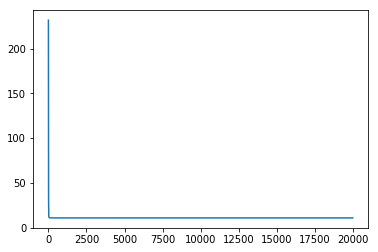

In [19]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# compute loss
def lossFunction(X,y):
  return (1/(2*len(y)))*np.sum((X-y)**2)
  


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: the final Weights
#         the loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs):
    # split the train data into train and validation data
    # train_X, valid_X, train_y, valid_y = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)
    
    n_size = len(y)
    w = np.random.rand(np.size(X,1),1)
    history = []
    history_v = []
    #history_w = np.zeros((numItrs))
    best_w = w
    
    for i in range(numItrs):
      gradient = -(1 / n_size) * ((X.T @ (y - (X @ w))))
      w = w - learning_rate * gradient
      y_predict = myPredictFun(X,w)
      y_validate = myPredictFun(X,w)
      history.append(lossFunction(y, y_predict))
      # history_v.append(lossFunction(valid_y @ w, y_validate))
      
    return w,history,history_v

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return np.matmul(X, w)

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss, loss_v = myGradientDescentFun(train_data_intercept,train_target,0.1,20000)

predict_target = myPredictFun(test_data_intercept, w)
train_predict = myPredictFun(train_data_intercept, w)
print(w)
#print(predict_target)
#print(w)

#predict_target = myPredictFun(test_data_intercept, w)

# Task 3-3: show intercept and coefficents


# Task 3-4: show errors on training dataset and testing dataset
print("Mean squared error train data: %.2f" %  mean_square_err(train_target,train_predict)) 
print("Mean squared error test data: %.2f" %  mean_square_err(test_target,predict_target)) 


# Task 3-5: plot learning curves showing training errors and testing errors along iterations

# # Get training and test loss histories
# training_loss = loss.history['loss']
# # Create count of the number of epochs
# epoch_count = range(1, len(training_loss) + 1)
# # Visualize loss history
# plt.plot(epoch_count, training_loss, 'r--')
# plt.legend(['Training Loss'])
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
plt.plot(loss)
plt.plot(loss_v)
plt.show()


<h4>Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

In [0]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Output: the final Weights
#         the loss history along batches
def myGradientDescentFun(X,y,learning_rate,epoches, batchsize):
  a = np.range(X.shape[0]) # number of rows in X    
  np. random.shuffle(a)
  new_X = X(a)
  new_y = y(a)
  
  X_batches = []
  y_batches = []
  for i in range(0, Xshape[0], batchsize):
    X_batch = X[i:i+batchsize]
    y_batch = y[i:i+batchsize]
    X_batches.append(X_batch)
    y_batches.append(y_batch)
  return X_batches, y_batches

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss = myGradientDescentFun(train_data_intercept,train_target,0,0,0)

# Task 4-3: show intercept and coefficents


# Task 4-4: show errors on training dataset and testing dataset


# Task 4-5: plot learning curves showing training errors and testing errors along bath

In [0]:
def batch_gradient(X,y,batchsize):
  # two ways to shuffle
  #First
  z = np.hstack(X,y)
  np.random.shuffle(z)
  
  # Second
  a = np.range(X.shape[0]) # number of rows in X
  np.random.shuffle(a)
  new_X = X(a)
  new_y = y(a)
  
  X_batches = []
  y_batches = []
  for i in range(0,X.shape[0],batchsize):
    X_batch = X[i:i+batchsize]
    y_batch = y[i:i+batchsize]
    X_batches.append(X_batch)
    y_batches.append(y_bathc)
  return X_batches, y_batches


def batch_gradient2(X,y,batchsize):
  
  
  for i in range(0,X.shape[0],batchsize):
    yield (X[i:i+batchsize], y[i:i+batchsize])
    
for batch in batch_gradient2(....):
  
    
  